0. Import necessary libraries and magics
    - Import all for the time being to support rapid iteration, even though it's not a sustainable practice

In [59]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# PREPARE

1. Set the batch size

In [2]:
bs = 64

# Batch size refers to the number of training examples utilized in one iteration. The batch size can be one of three 
# options:

# batch mode: where the batch size is equal to the total dataset thus making the iteration and epoch values equivalent
# mini-batch mode: where the batch size is greater than one but less than the total dataset size. Usually, a number
# that can be divided into the total dataset size.
# stochastic mode: where the batch size is equal to one. Therefore the gradient and the neural network parameters are
# updated after each sample.

2. Unpack the data and create a path to it

In [3]:
path = untar_data(URLs.PLANET_SAMPLE)
path.ls()

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/labels.csv'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/models')]

3. Set the path using functionality from the Python3 pathlib library; it gives us access to the different areas of the file structure, but I'm not sure how to use the different parts yet.

In [4]:
path_img = path/'train'
path_lab = path/'labels.csv'
path_mod = path/'models'

In [5]:
print(f'path_img:\n{path_img}\n\npath_lab:\n{path_lab}\n\npath_mod:\n{path_mod}')

path_img:
/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train

path_lab:
/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/labels.csv

path_mod:
/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/models


In [6]:
path_img.ls()[:5]

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_5788.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_31196.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_16457.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_37135.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_12585.jpg')]

In [7]:
# Creates paths to the individual images; we still need labels for those images
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_5788.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_31196.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_16457.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_37135.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_sample/train/train_12585.jpg')]

## Should we get the labels from the csv, or turn the csv into a df?

In [8]:
df = pd.read_csv(path_lab)
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


In [9]:
doc(ImageDataBunch)

In [10]:
# tfms = get_transforms(do_flip=False)
# # ImageDataBunch doesn't work without the inputs "folder='train'" and "suffix='.jpg'" for some reason
# idb = ImageDataBunch.from_df(path/'train', df, suffix='.jpg', ds_tfms=get_transforms(), tfms=tfms,
#                               bs=bs, size=224)
# idb.normalize(imagenet_stats)
# print(f'type(idb): \n{type(idb)} \n\n{idb}')


In [11]:
# print(f'type(idb): \n{type(idb)} \n')
# print(f'every 5th data class: \n{idb.classes[::5]}\n')

In [12]:
# idb.show_batch(rows=3, figsize=(7,6))

In [13]:
# print(idb.classes[:5])
# len(idb.classes),idb.c

In [14]:
# data2 = ImageDataBunch.from_csv(path, fnames, ds_tfms=tfms, size=24)
# data2

In [15]:
# data3 = (ImageItemList.from_folder(path) #Where to find the data? -> in path and its subfolders        
#         .label_from_folder()            #How to label? -> depending on the folder of the filenames
#         .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
#         .databunch())     

# TRAIN

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

NameError: name 'data' is not defined

In [ ]:
doc(fit_one_cycle)

In [ ]:
learn.fit_one_cycle(4)

# ------------------------------------------------------------------------

In [17]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [18]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [19]:
data = ImageDataBunch.from_csv(planet, folder='train', size=128, suffix='.jpg', label_delim = ' ', 
                               ds_tfms=planet_tfms)

In [20]:
planet.ls()

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_tiny/train'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_tiny/labels.csv'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_tiny/models')]

In [21]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [22]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        #Where to find the data? -> in planet 'train' folder
        .split_by_rand_pct()
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(label_delim=' ')
        #How to label? -> use the second column of the csv file and split the tags by ' '
        .transform(planet_tfms, size=128)
        #Data augmentation? -> use tfms with a size of 128
        .databunch())                          
        #Finally -> use the defaults for conversion to databunch

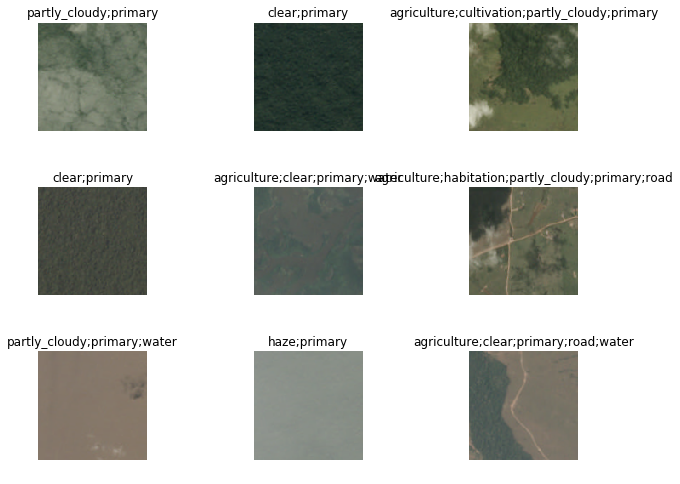

In [34]:
data.show_batch(rows=3, figsize=(9,7))

In [36]:
print(data.classes)

['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'clear', 'cloudy', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'water']


In [51]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [52]:
print(f'type(learn): {type(learn)} \n\n{learn}')

type(learn): <class 'fastai.basic_train.Learner'> 

Learner(data=ImageDataBunch;

Train: LabelList (160 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,partly_cloudy;primary;water,clear;primary;water,clear;primary,agriculture;clear;cultivation;primary;road
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_tiny;

Valid: LabelList (40 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
haze;primary,clear;primary,clear;primary,bare_ground;partly_cloudy;primary,clear;primary
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/data/planet_tiny;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  

In [66]:
doc(cnn_learner)

In [61]:
doc(accuracy)

In [65]:
# accuracy = accuracy(targs=targs.view(-1).long())
learn = create_cnn(data, models.resnet34, metrics=accuracy(accuracy, targs=targs.view(-1).long()))
learn.fit_one_cycle(1)

# # targs = targs.view(-1).long()
# learn.fit_one_cycle()

NameError: name 'targs' is not defined

In [ ]:
doc(fit_one_cycle)

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
path.ls()

In [ ]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])
learner.fit_one_cycle(1,1e-3)